In [47]:
import tensorflow as tf 
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv("/mnt/c/Users/YASH/OneDrive/Desktop/Gen_AI/ANN_autoencoder/data.xls")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [50]:
df.drop(['date', 'street', 'city' ,'statezip' ,'country'] , axis=1 , inplace=True)
df.shape

(4600, 13)

In [51]:
input_dim = 13 
latent_dim = 2
encoder = Sequential([
    Dense(10 , activation='relu' ,input_shape=(input_dim,)),
    Dense( 8 , activation='relu'),
    Dense( 6 , activation='relu'),
    Dense( latent_dim , activation='relu')
])

decoder = Sequential([
    Dense(6 , activation='relu'),
    Dense(5 , activation='relu'),
    Dense(4 , activation='relu'),
    Dense(input_dim , activation='relu'),
])

model = Sequential([encoder , decoder])
model.compile(loss="MSE" , optimizer="Adam")

In [56]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 2)                 296       
                                                                 
 sequential_13 (Sequential)  (None, 13)                142       
                                                                 
Total params: 438 (1.71 KB)
Trainable params: 438 (1.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


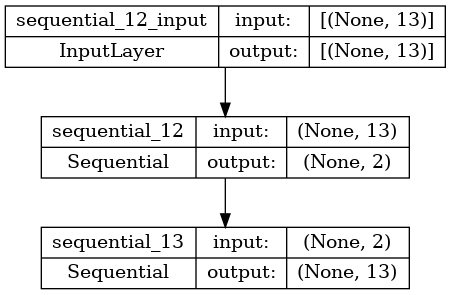

In [57]:
tf.keras.utils.plot_model(model, show_shapes=True)

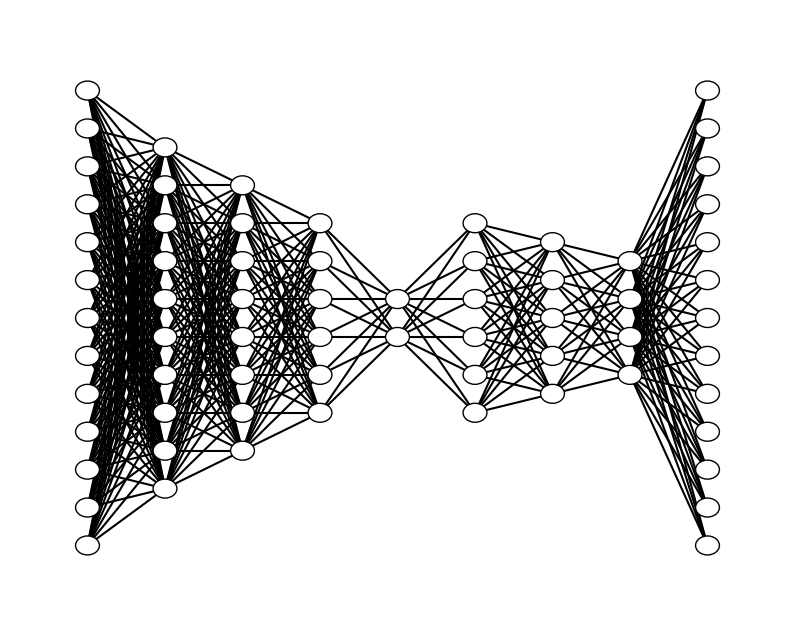

In [58]:

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''Draw a neural network cartoon using matplotilb.
    ax: axes on which to plot
    left, right, bottom, top: bounding box coordinates
    layer_sizes: list containing the number of neurons in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for i, n in enumerate(layer_sizes):
        layer_top = v_spacing*(n - 1)/2. + (top + bottom)/2.
        for m in range(n):
            circle = plt.Circle((left + i*h_spacing, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Connections
            if i < len(layer_sizes) - 1:
                next_layer_top = v_spacing*(layer_sizes[i+1] - 1)/2. + (top + bottom)/2.
                for o in range(layer_sizes[i+1]):
                    line = plt.Line2D([left + i*h_spacing, left + (i + 1)*h_spacing], 
                                      [layer_top - m*v_spacing, next_layer_top - o*v_spacing], c='k')
                    ax.add_artist(line)

layer_sizes = [13, 10, 8, 6, 2, 6, 5, 4, 13]

fig = plt.figure(figsize=(10, 8))
ax = fig.gca()
ax.axis('off')

# Draw the neural network
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.show()


In [52]:
history = model.fit(df.iloc[:4000 , :].to_numpy() , df.iloc[:4000 , :].to_numpy()  , epochs= 20)

Epoch 1/20
125/125 [==============================] - 2s 6ms/step - loss: 20641476608.0000
Epoch 2/20
125/125 [==============================] - 1s 8ms/step - loss: 181821024.0000
Epoch 3/20
125/125 [==============================] - 1s 8ms/step - loss: 135115200.0000
Epoch 4/20
125/125 [==============================] - 1s 8ms/step - loss: 129617280.0000
Epoch 5/20
125/125 [==============================] - 1s 7ms/step - loss: 125912432.0000
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 123899024.0000
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 123122272.0000
Epoch 8/20
125/125 [==============================] - 1s 5ms/step - loss: 122927800.0000
Epoch 9/20
125/125 [==============================] - 1s 6ms/step - loss: 122897200.0000
Epoch 10/20
125/125 [==============================] - 1s 5ms/step - loss: 122887856.0000
Epoch 11/20
125/125 [==============================] - 1s 5ms/step - loss: 122884720.0000
Epoch 12/20
125/1

In [53]:
pred = model.predict(df.iloc[4000:4600 , :].to_numpy())

19/19 [==============================] - 0s 2ms/step


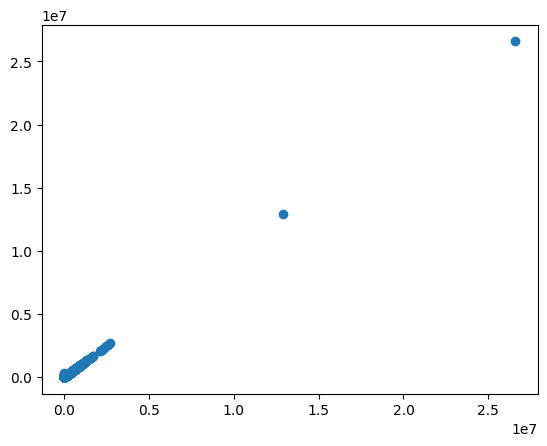

In [55]:
plt.scatter(pred ,df.iloc[4000:4600 , :].to_numpy() )